<a href="https://colab.research.google.com/github/surajparui/2022_problem/blob/main/AI_Exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
s = "I am Sam."
tokens = s.split(" ")
bigrams = [(tokens[i],tokens[i+1]) for i in range(0,len(tokens)-1)]
bigrams

[('I', 'am'), ('am', 'Sam.')]

In [ ]:
from collections import Counter
count = Counter(bigrams)
count

Counter({('I', 'am'): 1, ('am', 'Sam.'): 1})

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Corona_NLP_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41156 entries, 0 to 41155
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  500 non-null    object
 1   Sentiment      500 non-null    object
dtypes: object(2)
memory usage: 643.2+ KB


In [ ]:
df.isna().sum()

OriginalTweet    40656
Sentiment        40656
dtype: int64

In [ ]:
df['Sentiment'].value_counts()

Positive              140
Negative              125
Neutral                86
Extremely Positive     76
Extremely Negative     73
Name: Sentiment, dtype: int64

FEATURE EXTRACTION

In [ ]:
y=df['Sentiment'].values
y.shape

(41156,)

TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x, y = np.arange(10).reshape((5, 2)), range(5)
x = df['OriginalTweet'].to_numpy().reshape((100,5))
y = range(5)

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [ ]:
df_train=pd.read_csv("/content/Corona_NLP_train.csv")

In [ ]:
df_train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df_test=pd.read_csv("/content/Corona_NLP_test.csv")

In [ ]:
df_test.head()

,UserName,OriginalTweet,Sentiment
0,1.0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2.0,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3.0,Find out how you can protect yourself and love...,Extremely Positive
3,4.0,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5.0,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


REMOVING PUNCTUATION

In [ ]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [ ]:
#storing the puntuation free text in a new column called clean_msg
df_train['OriginalTweet']= df_train['OriginalTweet'].apply(lambda x:remove_punctuation(x))
df_test['OriginalTweet']= df_test['OriginalTweet'].apply(lambda x:remove_punctuation(x))
df_train.head()
#punctuations are removed from news column in train dataset

,OriginalTweet,Sentiment
0,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative


In [ ]:
df_train.head()

,OriginalTweet,Sentiment
0,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Code to generate n-grams

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

CREATING UNIGRAMS

In [ ]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
extremelyPositiveValues=defaultdict(int)
extremelyNegativeValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.Sentiment=="Positive"].OriginalTweet:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.Sentiment=="Negative"].OriginalTweet:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.Sentiment=="Neutral"].OriginalTweet:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="extremely positive"
for text in df_train[df_train.Sentiment=="Extremely Positive"].OriginalTweet:
  for word in generate_N_grams(text):
    extremelyPositiveValues[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="extremely negative"
for text in df_train[df_train.Sentiment=="Extremely Negative"].OriginalTweet:
  for word in generate_N_grams(text):
    extremelyNegativeValues[word]+=1

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))
df_extremely_positive=pd.DataFrame(sorted(extremelyPositiveValues.items(),key=lambda x:x[1],reverse=True))
df_extremely_negative=pd.DataFrame(sorted(extremelyNegativeValues.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]
epd1=df_extremely_positive[0][:10]
epd2=df_extremely_positive[1][:10]
end1=df_extremely_negative[0][:10]
end2=df_extremely_negative[1][:10]

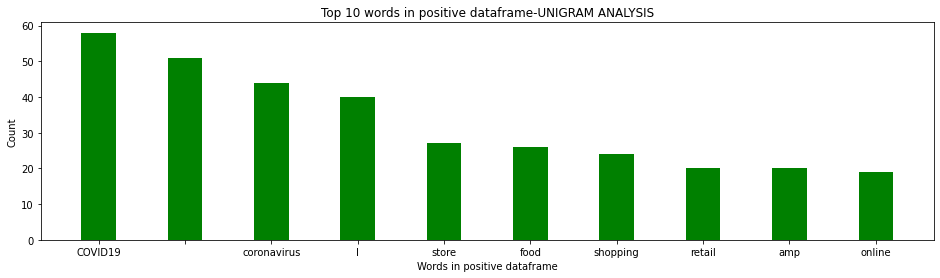

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

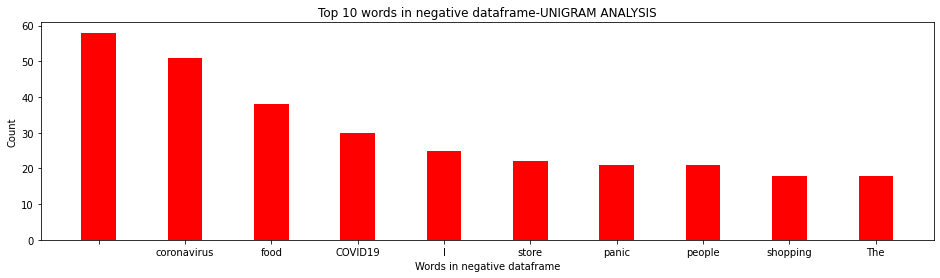

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

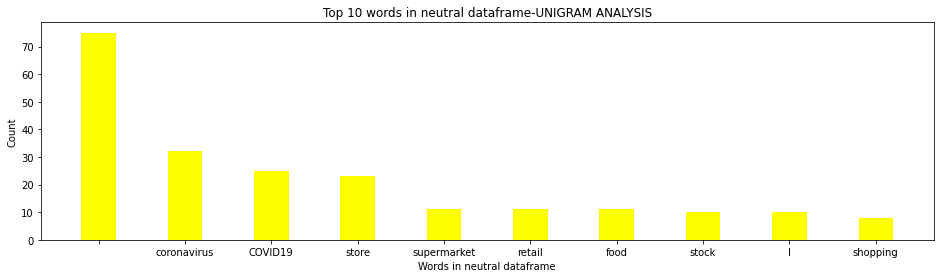

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

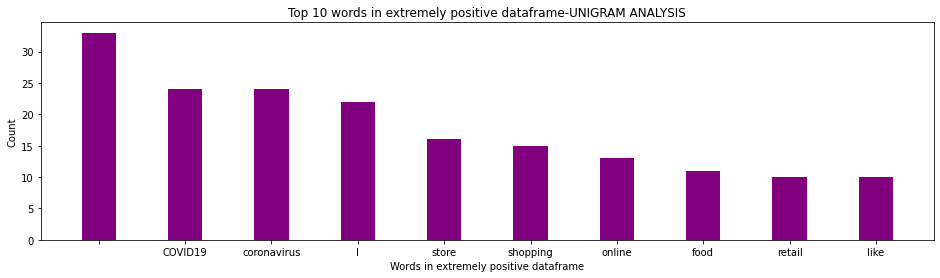

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(epd1,epd2, color ='purple',
        width = 0.4)
plt.xlabel("Words in extremely positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("extremely-positive-unigram.png")
plt.show()

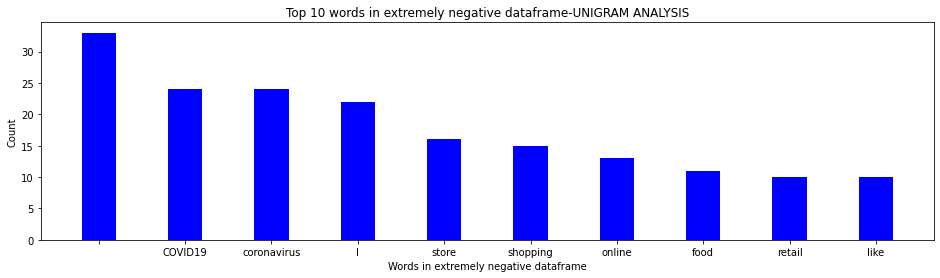

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(epd1,epd2, color ='blue',
        width = 0.4)
plt.xlabel("Words in extremely negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("extremely-negative-unigram.png")
plt.show()

Creating bigrams

In [ ]:
from collections import defaultdict
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
extremelyPositiveValues2=defaultdict(int)
extremelyNegativeValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.Sentiment=="Positive"].OriginalTweet:
  for word in generate_N_grams(text):
    positiveValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.Sentiment=="Negative"].OriginalTweet:
  for word in generate_N_grams(text):
    negativeValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.Sentiment=="Neutral"].OriginalTweet:
  for word in generate_N_grams(text):
    neutralValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="extremely positive"
for text in df_train[df_train.Sentiment=="Extremely Positive"].OriginalTweet:
  for word in generate_N_grams(text):
    extremelyPositiveValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="extremely negative"
for text in df_train[df_train.Sentiment=="Extremely Negative"].OriginalTweet:
  for word in generate_N_grams(text):
    extremelyNegativeValues2[word]+=1

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))
df_extremely_positive2=pd.DataFrame(sorted(extremelyPositiveValues2.items(),key=lambda x:x[1],reverse=True))
df_extremely_negative2=pd.DataFrame(sorted(extremelyNegativeValues2.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]
epd1bi=df_extremely_positive2[0][:10]
epd2bi=df_extremely_positive2[1][:10]
end1bi=df_extremely_negative2[0][:10]
end2bi=df_extremely_negative2[1][:10]

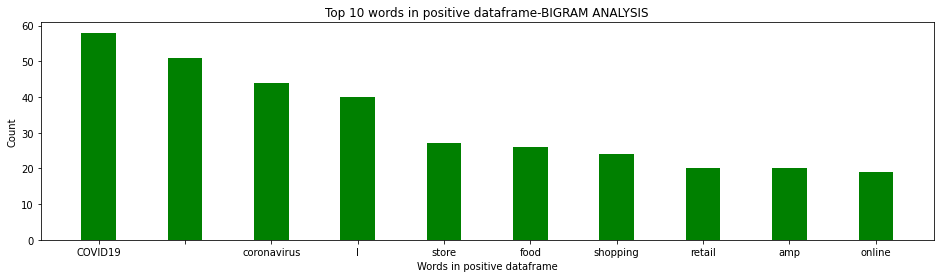

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

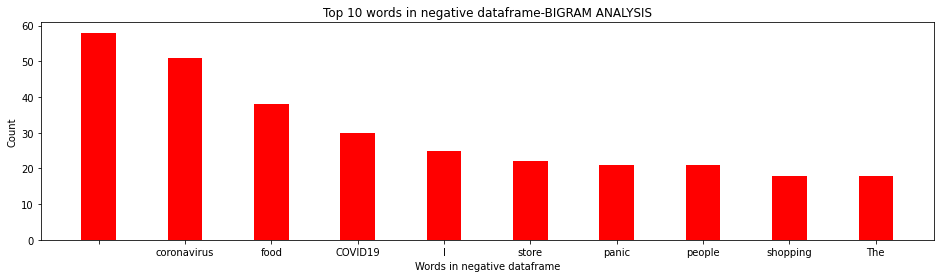

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

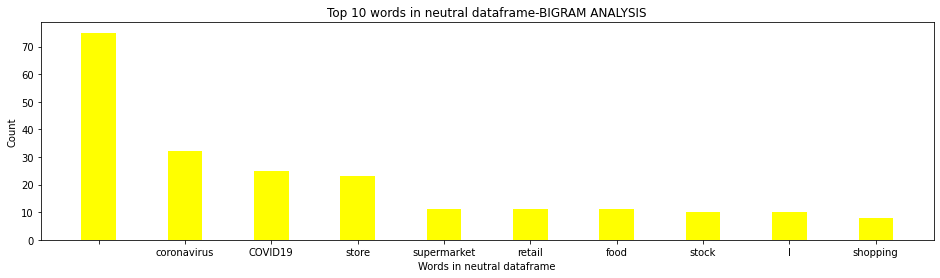

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

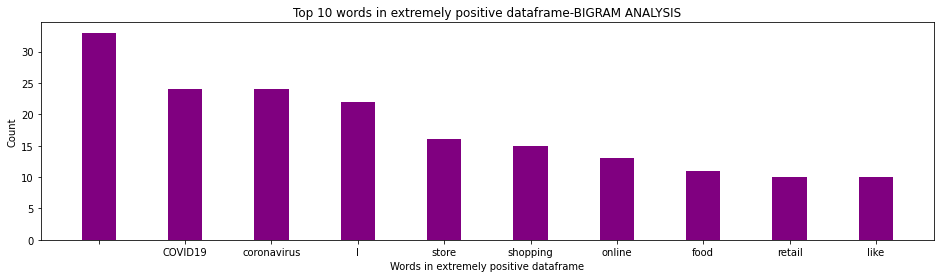

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(epd1bi,epd2bi, color ='purple',
        width = 0.4)
plt.xlabel("Words in extremely positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely positive dataframe-BIGRAM ANALYSIS")
plt.savefig("extremely-positive-biigram.png")
plt.show()

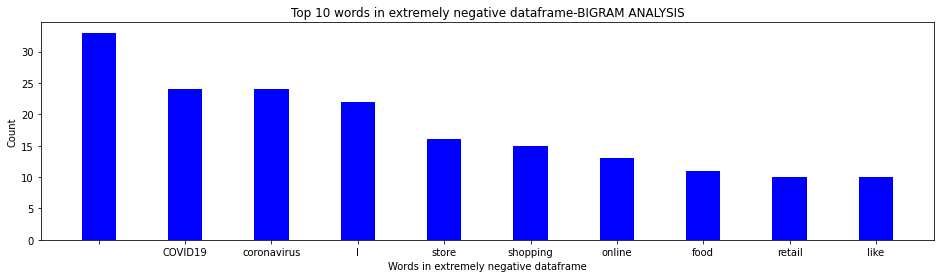

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(epd1bi,epd2bi, color ='blue',
        width = 0.4)
plt.xlabel("Words in extremely negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely negative dataframe-BIGRAM ANALYSIS")
plt.savefig("extremely-negative-biigram.png")
plt.show()

Creating trigrams

In [ ]:
from collections import defaultdict
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
extremelyPositiveValues3=defaultdict(int)
extremelyNegativeValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.Sentiment=="Positive"].OriginalTweet:
  for word in generate_N_grams(text):
    positiveValues3[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.Sentiment=="Negative"].OriginalTweet:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.Sentiment=="Neutral"].OriginalTweet:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="extremely positive"
for text in df_train[df_train.Sentiment=="Extremely Positive"].OriginalTweet:
  for word in generate_N_grams(text,3):
    extremelyPositiveValues3[word]+=1#focus on more frequently occuring words for every sentiment=>

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="extremely negative"
for text in df_train[df_train.Sentiment=="Extremely Negative"].OriginalTweet:
  for word in generate_N_grams(text,3):
    extremelyNegativeValues3[word]+=1#focus on more frequently occuring words for every sentiment=>

In [ ]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))
df_extremely_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_extremely_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))

pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]
 

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]
 

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]


epd1tri=df_extremely_positive3[0][:10]
epd2tri=df_extremely_positive3[1][:10]
 

end1tri=df_extremely_negative3[0][:10]
end2tri=df_extremely_negative3[1][:10]

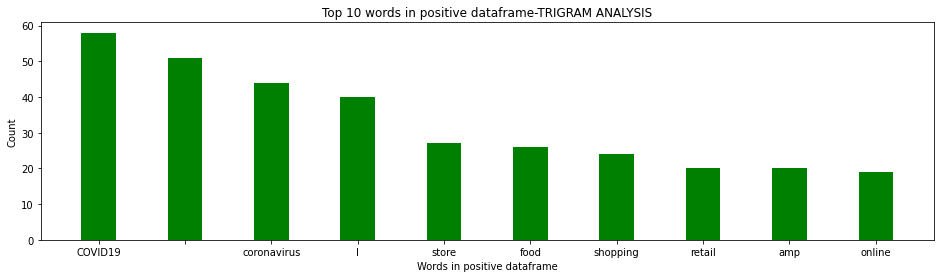

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

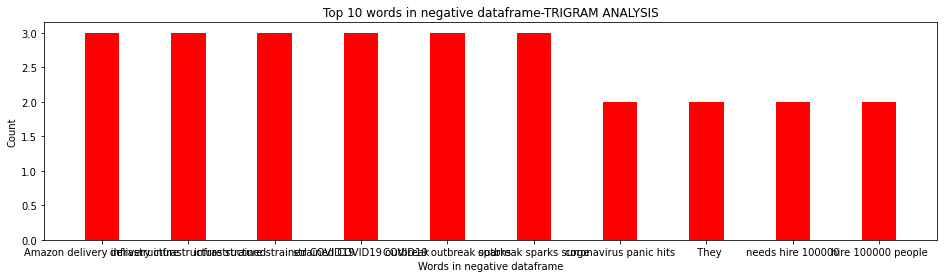

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

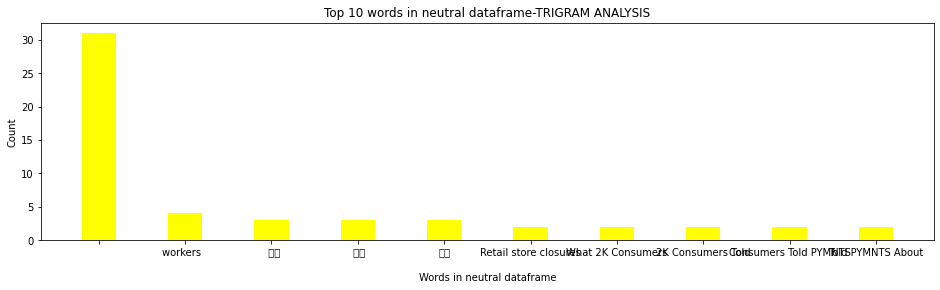

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

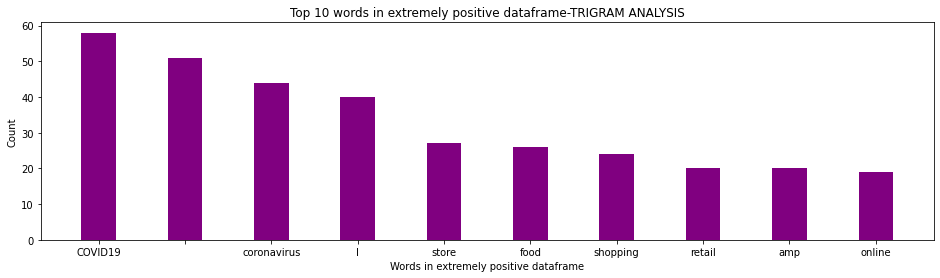

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(epd1tri,epd2tri, color ='purple',
        width = 0.4) 
plt.xlabel("Words in extremely positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("extremely-positive-trigram.png")
plt.show()

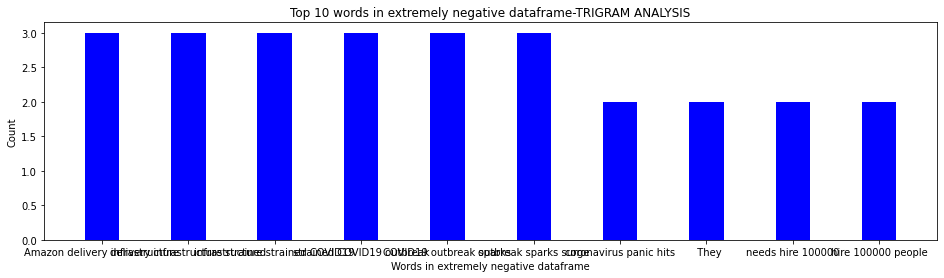

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(end1tri,end2tri, color ='blue',
        width = 0.4) 
plt.xlabel("Words in extremely negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("extremely-negative-trigram.png")
plt.show()